In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
df = pd.read_csv('../dataset/Churn_Modelling.csv')

#feature engineering


In [27]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


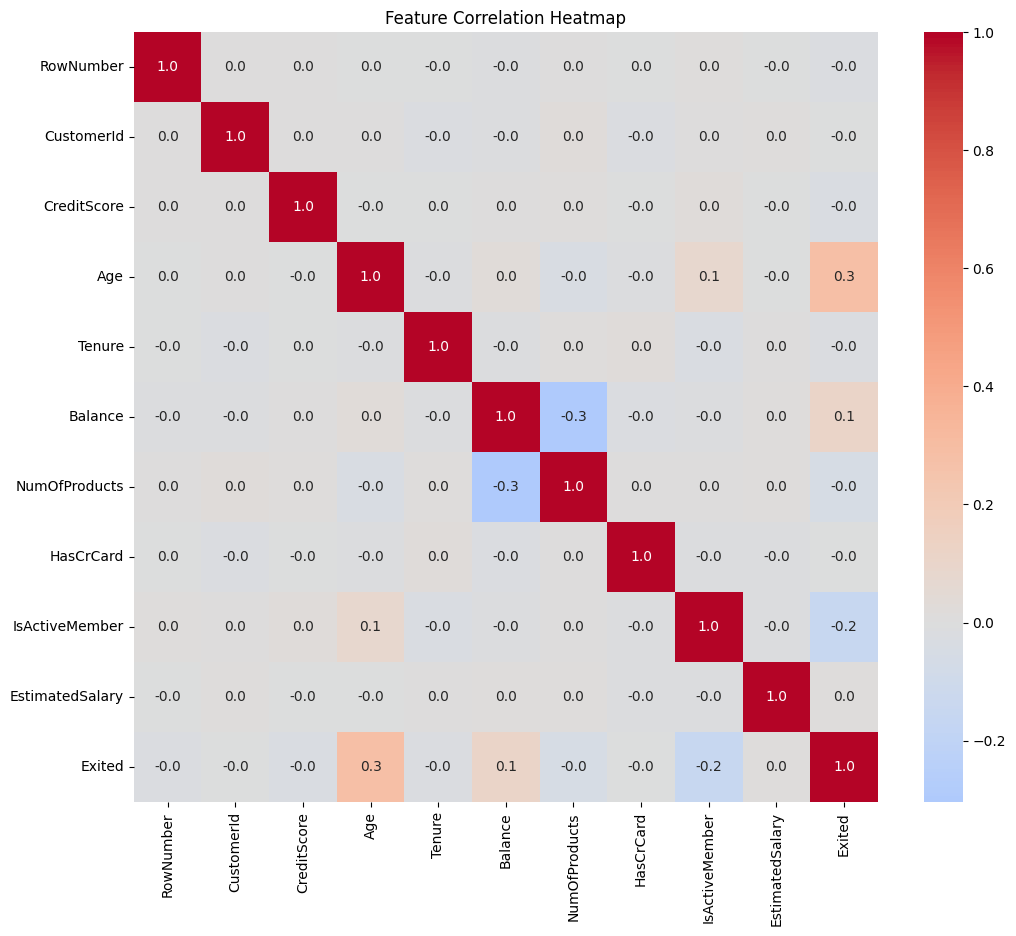

In [70]:
plt.figure(figsize=(12,10))

# use only numeric columns
numeric_df = df.select_dtypes(include=['int64','float64'])

cor = numeric_df.corr()

sns.heatmap(cor, annot=True, fmt='.1f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()


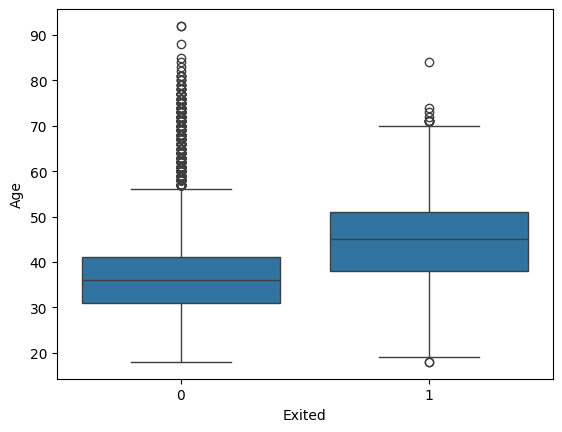

In [30]:
# box plot to see the the data sctatter between the age and the exit

sns.boxplot(x= 'Exited', y= 'Age', data=df)
plt.show()

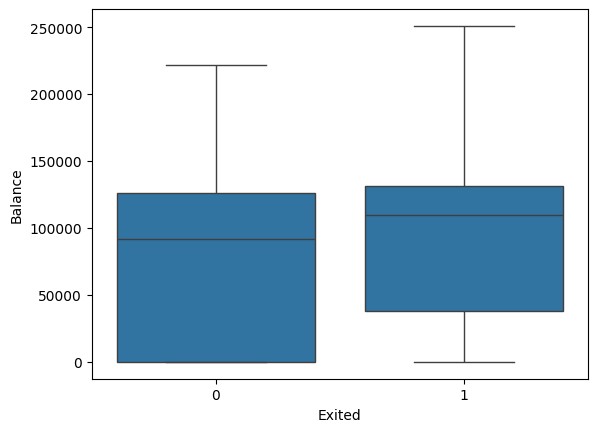

In [31]:
# balance vs exit

sns.boxplot(x= 'Exited', y= 'Balance', data=df)
plt.show()

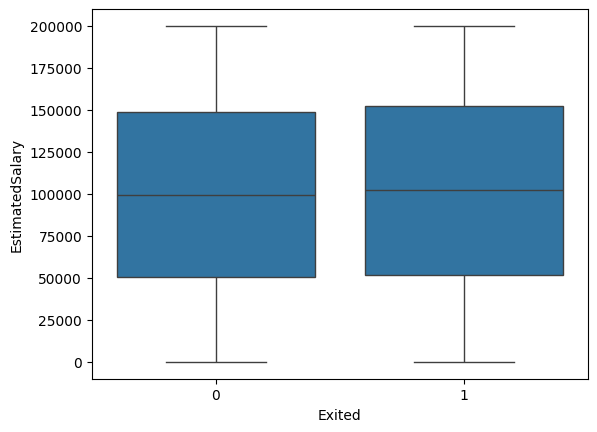

In [32]:
# exit vs estimated salary
sns.boxplot(x= 'Exited', y= 'EstimatedSalary', data=df)
plt.show()

In [42]:
X=df['Exited']
Y = df[['Age', 'Balance', 'EstimatedSalary', 'CreditScore', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']]

In [43]:
# spleat the the data into the tesing and training dada
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


x_train,x_test,y_train,y_test = train_test_split(Y, X, test_size=0.2)
scalling = StandardScaler()
scalling.fit(x_train)

,copy,True
,with_mean,True
,with_std,True


In [45]:
# feeding and training the model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)



c:\Users\yadav\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.803

In [47]:
model.coef_
# Y = df[['Age', 'Balance', 'EstimatedSalary', 'CreditScore', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']]

array([[ 3.06289581e-02,  3.77143020e-06, -5.54473001e-07,
        -3.46673677e-03, -1.63206001e-02, -1.30863826e-01,
        -5.44172118e-02, -3.57981489e-01]])

In [59]:
# prediction
model.predict([[80, 10, 500, 500, 3, 2, 1, 1]])

c:\Users\yadav\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [64]:
# creating the piplining 
from sklearn.pipeline import make_pipeline
test_score=[]

for lam in np.arange(0.1,100,0.1):
     pipe = make_pipeline(StandardScaler(), LogisticRegression(C=1/lam))
     pipe.fit(x_train, y_train)
     test_score.append(pipe.score(x_test, y_test))
     

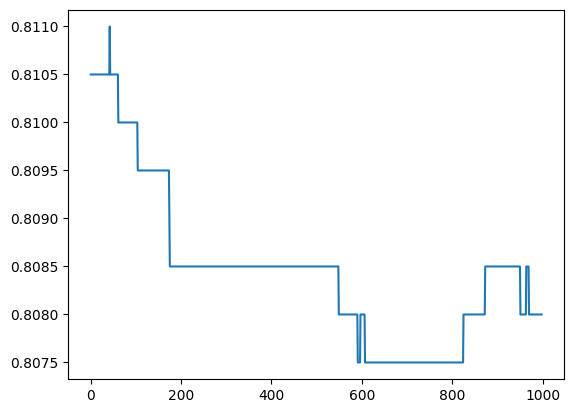

In [65]:
plt.plot(test_score)

In [66]:
np.argmax(test_score)

np.int64(42)

In [68]:
lamda_bast= 0.1 * np.argmax(test_score)*0.1
print(lamda_bast)

0.42000000000000004


#best prediction


In [69]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(C=1/lamda_bast))
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.8105